### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
# %matplotlib inline

In [2]:
data = pd.read_csv('Data for Associate DS.csv',)
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
#finding if there is any missing value

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [7]:
#imputing the missing values with median

data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median(),inplace = True)

data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median(),inplace = True)

In [8]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Deriving new Key Performance Indicators for by implementing Feature Engineering:

#### 1. Monthly average purchase and advance amount.

In [9]:
#The average monthly purchase will be the total purchases

data['Monthly_avg_purchase'] = data['PURCHASES'] / data['TENURE']

In [10]:
# different tenure values of different customers

print(data.groupby('TENURE')['TENURE'].count())


TENURE
6      204
7      190
8      196
9      175
10     236
11     365
12    7584
Name: TENURE, dtype: int64


#### Advance amount:

In [11]:
data['Monthly_cash_advance'] = data['CASH_ADVANCE'] / data['TENURE']

#### Types of purchases (one-off or installments):

In [12]:
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

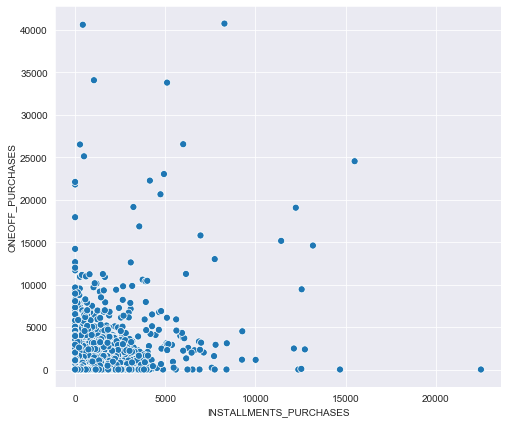

In [13]:
plt.figure(figsize = (8,7))
sns.set_style('darkgrid')
ax = sns.scatterplot(data = data,y = data.ONEOFF_PURCHASES,x = data.INSTALLMENTS_PURCHASES,marker = '.',s = (200,200))
plt.show()

#### 2. Types of purchases(one-off,installments):

In [14]:
def purchase_type(data):
    if(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] == 0):
        return 'No Purchase'
    if(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] == 0):
        return 'One Off Purchase'
    if(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] > 0):
        return 'Installment '
    if(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] > 0):
         return 'Both'

In [15]:
data['Purchase_Type'] = data.apply(purchase_type,axis = 1)

In [16]:
# We can know the different types of categories of customer by looking at the type of purchases
data['Purchase_Type'].value_counts()

Both                2774
Installment         2260
No Purchase         2042
One Off Purchase    1874
Name: Purchase_Type, dtype: int64

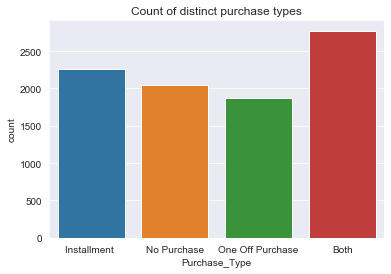

In [17]:
sns.countplot(data = data,x = 'Purchase_Type')
plt.title('Count of distinct purchase types')
plt.show()

#### It is visible that most people did both type of purchases.

#### 4. Limit Usage (balance to credit limit ratio)

In [18]:
data['Limit Usage'] = data['BALANCE'] / data['CREDIT_LIMIT']

In [19]:
# data['Limit Usage'] = data['Limit Usage'] / 100
data['Limit Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: Limit Usage, Length: 8950, dtype: float64

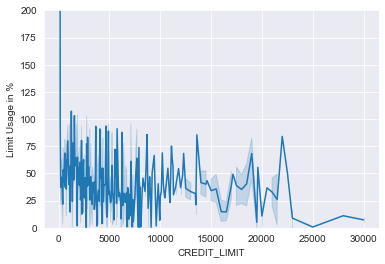

In [20]:
sns.lineplot(data = data,y = data['Limit Usage'] * 100,x = 'CREDIT_LIMIT',)
plt.ylabel('Limit Usage in %')
plt.ylim(0, 200)
plt.show()

In [21]:
## Number of people who spend more than their credit limit:

data[data['Limit Usage'] > 1].shape[0]

227

#### Conclusion: 
#### There are 227 people who overspend.

#### 5. Payments to minimum payments ratio.

In [22]:
data['Pay_To_Min_Pay_Ratio'] = data['PAYMENTS'] / data['MINIMUM_PAYMENTS']

In [23]:
data.Pay_To_Min_Pay_Ratio

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: Pay_To_Min_Pay_Ratio, Length: 8950, dtype: float64

In [24]:
data['Purchase_Type'].describe()

count     8950
unique       4
top       Both
freq      2774
Name: Purchase_Type, dtype: object

#### 6. Based on purchase frequency, we can create a new KPI: Purchase Frequency Class(<=25%, >25 and <= 50 etc..)

In [25]:
def purchase_class(data):
    if(data['PURCHASES_FREQUENCY'] * 100 < 25):
        return '0 to 24'
    if(data['PURCHASES_FREQUENCY'] * 100 < 50):
        return '25 to 49'
    if(data['PURCHASES_FREQUENCY'] * 100 < 75):
        return '50 to 74'
    return '75 to 100'    

In [26]:
data['PURCHASES_FREQUENCY_CLASS'] = data.apply(purchase_class,axis = 1)
data.PURCHASES_FREQUENCY_CLASS.value_counts()

75 to 100    3403
0 to 24      3305
50 to 74     1139
25 to 49     1103
Name: PURCHASES_FREQUENCY_CLASS, dtype: int64

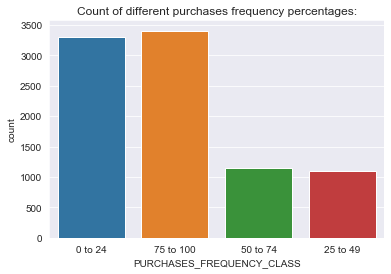

In [27]:
#plotting the purchase frequency class KPI:

sns.countplot(data = data,x = 'PURCHASES_FREQUENCY_CLASS')
plt.title('Count of different purchases frequency percentages:')
plt.show()

### We can observe that most of the customers lie between either less than 25 or greater than 75 percent.

In [28]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count             8950.000000  ...    8950.000000   8950.000000   8950.000000   
mean                 0.135144  ...      14.709832   4494.282473   1733.143852   
std                  0.200121  ...      24.857649   3638.646702   2895.063757   
min                  0.000000  ...       0.000000     50.000000      0.000000   
25%                  0.000000  ...       1.000000   1600.000000    383.276166   
50%                  0.000000  ...       7.000000   3000.000000    856.901546   
75%                  0.222222  ...      17.000000   6500.000000   1901.134317   
max                  1.500000  ...     358.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  Monthly_avg_purchase  \
count       8950.000000       8950.000000  8950.000000           8950.000000   
mean         844.906767          0.153715    11.517318             86.175173   
std         2332.792322          0.292499     1.338331            180.508787   
min            0.019163          0.000000     6.000000              0.000000   
25%          170.857654          0.000000    12.000000              3.399375   
50%          312.343947          0.000000    12.000000             31.936667   
75%          788.713501          0.142857    12.000000             97.228333   
max        76406.207520          1.000000    12.000000           4086.630833   

       Monthly_cash_advance  Limit Usage  Pay_To_Min_Pay_Ratio  
count           8950.000000  8950.000000           8950.000000  
mean              88.977984     0.388884              9.059164  
std              193.136115     0.389722            118.180526  
min                0.000000     0.000000              0.000000  
25%                0.000000     0.041494              0.913275  
50%                0.000000     0.302720              2.032717  
75%               99.085196     0.717571              6.052729  
max             3928.100980    15.909951           6840.528861  

[8 rows x 21 columns]

### Preprocessing the data

In [29]:
# dropping the cutomer id column
data.drop(['CUST_ID'],axis = 1,inplace=True)
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance',
       'Purchase_Type', 'Limit Usage', 'Pay_To_Min_Pay_Ratio',
       'PURCHASES_FREQUENCY_CLASS'],
      dtype='object')

In [30]:

cont_features = []
for i in data.columns:
    if((data[i].dtype) == 'int64' or (data[i].dtype) == 'float64'):
        cont_features.append(i)

cont_features

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_avg_purchase',
 'Monthly_cash_advance',
 'Limit Usage',
 'Pay_To_Min_Pay_Ratio']

In [31]:
# standardizing the columns with mean > 0 or std > 1
sc = StandardScaler()
for i in cont_features:
    data[i] = sc.fit_transform(data[i].values.reshape(-1,1))


In [32]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  ...  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
0               -0.675349  ... -0.528979         -0.302400         -0.525551   
1                0.573963  ...  0.818642          0.097500          0.234227   
2               -0.675349  ... -0.383805         -0.093293         -0.525551   
3               -0.258913  ... -0.598688         -0.228307         -0.525551   
4               -0.675349  ... -0.364368         -0.257266         -0.525551   

    TENURE  Monthly_avg_purchase  Monthly_cash_advance     Purchase_Type  \
0  0.36068             -0.433384             -0.460727      Installment    
1  0.36068             -0.477428              2.319396       No Purchase   
2  0.36068             -0.120468             -0.460727  One Off Purchase   
3  0.36068              0.214636             -0.371929  One Off Purchase   
4  0.36068             -0.470041             -0.460727  One Off Purchase   

   Limit Usage  Pay_To_Min_Pay_Ratio PURCHASES_FREQUENCY_CLASS  
0    -0.892951             -0.064419                   0 to 24  
1     0.176063             -0.044282                   0 to 24  
2    -0.144206             -0.068268                 75 to 100  
3    -0.427665             -0.076660                   0 to 24  
4     0.750693             -0.053210                   0 to 24  

[5 rows x 23 columns]

In [33]:
# encoding categorical variables

cat_features = []
for i in data.columns:
    if((data[i].dtype) == 'object'):
        cat_features.append(i)

cat_features

['Purchase_Type', 'PURCHASES_FREQUENCY_CLASS']

In [34]:
label_encoder = LabelEncoder()
for i in cat_features:
    data[i] = label_encoder.fit_transform(data[i].values.reshape(-1,1))


In [35]:
data[cat_features].nunique()

Purchase_Type                4
PURCHASES_FREQUENCY_CLASS    4
dtype: int64

### Now that our data is ready, we can apply PCA for dimensionality reduction.

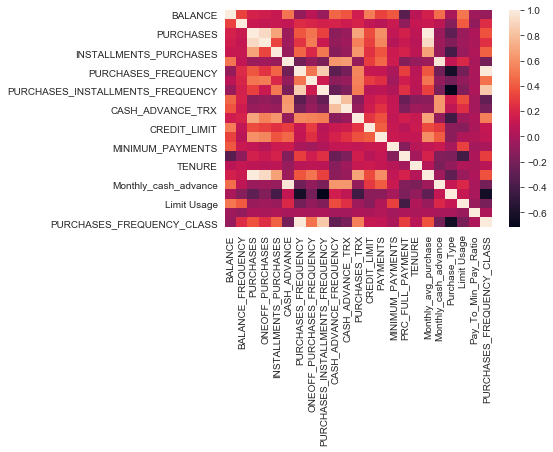

In [36]:
sns.heatmap(data.corr())
plt.show()

In [37]:
covariance_matrix = np.cov(data.T)
covariance_matrix[0:3]

array([[ 1.00011174,  0.32244833,  0.181281  ,  0.16436802,  0.12648316,
         0.49674704, -0.07795245,  0.07317426, -0.06319282,  0.44926823,
         0.38519531,  0.15435561,  0.53135553,  0.32283773,  0.39796451,
        -0.31899484,  0.07270039,  0.17973145,  0.47548389,  0.00268393,
         0.50361295, -0.03945057, -0.09514337],
       [ 0.32244833,  1.00011174,  0.13368937,  0.10433488,  0.12430607,
         0.0993991 ,  0.22974114,  0.20243794,  0.17609907,  0.19189412,
         0.14157068,  0.18964713,  0.095942  ,  0.06501513,  0.13119544,
        -0.09509307,  0.11978927,  0.13129551,  0.08602949, -0.15716001,
         0.40470617, -0.08928162,  0.3131779 ],
       [ 0.181281  ,  0.13368937,  1.00011174,  0.91694701,  0.67997219,
        -0.05147997,  0.39306135,  0.49848543,  0.31560195, -0.12015662,
        -0.06718279,  0.68963789,  0.35701681,  0.60333124,  0.09579955,
         0.18039922,  0.08629784,  0.99595653, -0.0554787 , -0.33304885,
        -0.05741503,  0.0167

In [38]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_vectors[0:3]

array([[ 6.10584221e-03,  3.61287764e-01, -1.02466148e-01,
        -2.37636612e-01,  1.59535169e-01,  1.29118696e-01,
         2.35522267e-03, -2.45422225e-01,  1.66788817e-01,
         1.87718109e-01,  3.56393659e-02,  7.18765927e-02,
         8.08797543e-02, -3.59062043e-01,  1.43890990e-01,
         4.37554975e-02, -5.21624677e-01,  4.46314234e-01,
        -2.75103743e-02, -2.17761846e-02, -1.88526933e-03,
         3.81090951e-04, -4.09999943e-05],
       [ 7.99645681e-02,  1.37999306e-01, -2.33006900e-01,
        -3.52523590e-01, -3.10054946e-01,  1.63332454e-01,
        -6.45324273e-02,  1.45776341e-01, -2.54566765e-01,
         5.27968396e-01, -1.29539198e-01,  2.81275080e-02,
        -2.29671520e-01,  4.69472058e-01,  5.36149638e-02,
        -8.06508501e-02, -1.38486695e-02,  6.25596418e-02,
        -7.14211944e-04, -2.24543497e-03, -5.91522363e-04,
         2.44989928e-04, -9.97621577e-06],
       [ 2.97523312e-01,  1.63077419e-01,  3.02243668e-01,
        -5.21668976e-02, -3.7

In [39]:
eigen_vec_svd,s , v = np.linalg.svd(data.T)
eigen_vec_svd[0:3]

array([[-2.94704606e-04,  2.58358595e-01, -2.54075145e-01,
        -9.93789384e-02,  2.37558046e-01, -2.12152586e-01,
        -2.06493126e-02, -3.61886800e-02,  2.72268548e-01,
        -8.41603654e-02, -1.88723714e-01, -3.86990112e-02,
         1.19302616e-01, -3.46599163e-01,  1.47289044e-01,
        -3.70056065e-02,  2.74003196e-01, -6.27037213e-01,
         1.04575772e-01,  1.48731452e-02,  2.18181833e-02,
         3.55754593e-04, -4.00091390e-05],
       [ 7.70622044e-02,  9.88758718e-02, -1.03849234e-01,
        -2.27283514e-01,  3.53234388e-01,  2.05517257e-01,
        -2.87431661e-01,  1.25912604e-01, -1.12403152e-01,
         3.40778005e-01, -4.84632902e-01,  1.31810846e-01,
         2.42208379e-03,  5.09367485e-01,  5.02951564e-02,
         7.41652627e-02,  8.32356004e-03, -2.73365135e-02,
         8.27839827e-02,  1.36590768e-02,  2.20989172e-03,
         1.86154770e-04, -7.38384420e-06],
       [ 2.77313562e-01,  2.03494812e-01, -2.45625793e-02,
         2.95530898e-01,  5.2

In [40]:
for val in eigen_values:
    print(val)

6.868735824765016
4.4510868066595375
2.3419340750262547
1.73135953212714
1.1422675286572737
1.0892085568590586
0.9819211662269598
0.8962383960315053
0.7766824550320065
0.6752335528253195
0.616439932424875
0.5455117885147677
0.44845869050817855
0.41188183144764745
0.3022953833706421
0.271015504651207
0.17932513798614771
0.1737411588962744
0.07490473956746797
0.016238791383614986
0.014524824027682537
0.004405041818071403
1.1635427899263022e-05


In [41]:
var_explained = [(i/sum(eigen_values)) * 100 for i in eigen_values]
var_explained

[28.60373554190112,
 18.535828592023364,
 9.752604358009286,
 7.209965770754997,
 4.7567877323235646,
 4.535832255775848,
 4.089051330302392,
 3.732239340193264,
 3.2343680279085483,
 2.8119005398922163,
 2.567064049977747,
 2.271695306348416,
 1.8675334314814853,
 1.715215038372137,
 1.2588600613079004,
 1.1286000831256602,
 0.7467704325557134,
 0.7235168579194073,
 0.31192863084032335,
 0.06762381115056439,
 0.06048627227481058,
 0.018344081710179948,
 4.8453851048895654e-05]

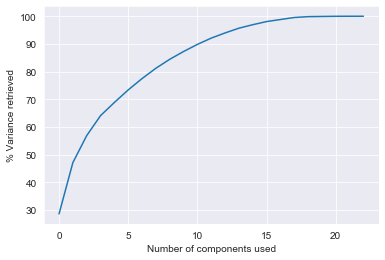

In [42]:
sns.lineplot(x = [i for i in range(len(var_explained))]
,y = np.cumsum(var_explained))
plt.xlabel("Number of components used")
plt.ylabel("% Variance retrieved")
plt.show()

### Since using 5 principal components retain around 97 % of variance, we'll reduce the number of dimensions from 22 to 5.

In [43]:
projection_matrix = eigen_vectors[:,0:6]
projection_matrix

array([[ 0.00610584,  0.36128776, -0.10246615, -0.23763661,  0.15953517,
         0.1291187 ],
       [ 0.07996457,  0.13799931, -0.2330069 , -0.35252359, -0.31005495,
         0.16333245],
       [ 0.29752331,  0.16307742,  0.30224367, -0.0521669 , -0.03774966,
        -0.1525043 ],
       [ 0.23945232,  0.16419831,  0.36428677, -0.05029166, -0.19158467,
        -0.03781431],
       [ 0.26350611,  0.0838558 ,  0.04543437, -0.03091299,  0.26266447,
        -0.29111929],
       [-0.08947898,  0.37623948, -0.15580778,  0.28246399,  0.0416371 ,
         0.03900329],
       [ 0.32293859, -0.08754368, -0.26502924,  0.0482118 , -0.09814145,
         0.06392352],
       [ 0.22782925,  0.06109624,  0.1036229 , -0.03178625, -0.41401871,
         0.35806681],
       [ 0.28707012, -0.08775084, -0.32653607,  0.05370422,  0.14855133,
        -0.13878193],
       [-0.13197856,  0.3308902 , -0.17389288,  0.09792847, -0.1974592 ,
        -0.07817498],
       [-0.09414883,  0.32593492, -0.18610759,  0.

In [44]:
data_pca = data.dot(projection_matrix)
data_pca # Final data after dimensionality reduction

0         1         2         3         4         5
0    -1.460962 -1.714735  0.703220 -0.112557  0.038267  0.097205
1    -2.314668  2.725415 -0.072621  1.269176  0.370210  0.959909
2     1.251212 -0.524874  0.211947 -0.897837 -2.097788  2.732674
3    -1.500162 -0.279262  2.233472 -0.240842 -0.035789  0.868831
4    -2.180445 -0.950593  1.029204 -1.410678 -0.814244  0.335175
...        ...       ...       ...       ...       ...       ...
8945  1.270828 -2.424757 -1.616353  1.650341 -2.189136 -2.198948
8946  1.048534 -2.207563 -1.741136  0.992236 -2.151763 -2.376439
8947  0.718374 -2.421604 -1.351806  1.542974 -2.037597 -2.273482
8948 -2.298085 -1.424753  0.875793  1.239225 -2.144355 -2.369188
8949 -0.127013 -0.583460  0.809681  0.825625 -3.859352 -1.813452

[8950 rows x 6 columns]

### Now we will use the reduced data for Kmeans Clustering.

In [45]:
data[cat_features].nunique()

Purchase_Type                4
PURCHASES_FREQUENCY_CLASS    4
dtype: int64

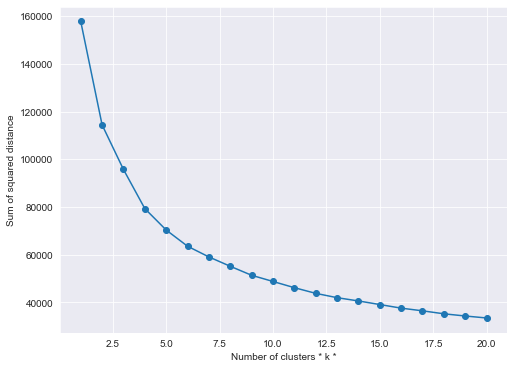

In [46]:
squared_dist = []
list_k = list(range(1, 21))
for k in list_k:
    model = KMeans(n_clusters = k,)
    model.fit(data_pca)
    squared_dist.append(model.inertia_)
# Plot squared_error against k
plt.figure(figsize=(8, 6))
plt.plot(list_k, squared_dist, '-o')
plt.xlabel('Number of clusters * k *')
plt.ylabel('Sum of squared distance')
plt.show()

In [47]:
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 42)
model.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [48]:
y_kmeans = model.predict(data_pca)
X = data_pca

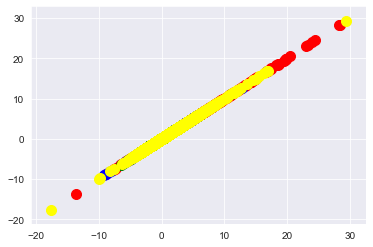

In [51]:
plt.scatter(X[y_kmeans==0], X[y_kmeans==0], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1], X[y_kmeans==1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2], X[y_kmeans==2], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3], X[y_kmeans== 3], s=100, c='yellow', label ='Cluster 4')
# plt.scatter(X[y_kmeans==4], X[y_kmeans==4], s=100, c='yellow', label ='Cluster 5')
# plt.scatter(X[y_kmeans==5], X[y_kmeans==5], s=100, c='pink', label ='Cluster 6')
# plt.scatter(X[y_kmeans==6], X[y_kmeans==6], s=100, c='magenta', label ='Cluster 7')
plt.show()

In [50]:
pd.Series(model.labels_).value_counts()

1    3923
2    3784
3     970
0     273
dtype: int64

In [52]:
cluster_data = pd.concat([data[data.columns],pd.Series(model.labels_,name='Cluster')],axis = 1)

In [53]:
cluster_data_group = cluster_data.groupby('Cluster')\
.apply(lambda x: x[data.columns].mean()).T
cluster_data_group

Cluster                                  0         1         2         3
BALANCE                           1.153541 -0.262303 -0.203554  1.530254
BALANCE_FREQUENCY                 0.448630  0.198745 -0.328929  0.353106
PURCHASES                         3.951053  0.123128 -0.351611 -0.238323
ONEOFF_PURCHASES                  3.510723  0.015519 -0.227425 -0.163643
INSTALLMENTS_PURCHASES            2.893219  0.262507 -0.413484 -0.262929
CASH_ADVANCE                     -0.126190 -0.342147 -0.156587  2.030121
PURCHASES_FREQUENCY               1.110900  0.908200 -0.880831 -0.549564
ONEOFF_PURCHASES_FREQUENCY        1.827591  0.299061 -0.385711 -0.219194
PURCHASES_INSTALLMENTS_FREQUENCY  1.000859  0.824102 -0.798660 -0.499030
CASH_ADVANCE_FREQUENCY           -0.303454 -0.416438 -0.017061  1.836175
CASH_ADVANCE_TRX                 -0.141131 -0.323221 -0.109924  1.775749
PURCHASES_TRX                     3.296642  0.319998 -0.491951 -0.302877
CREDIT_LIMIT                      1.633211 -0.046922 -0.300926  0.904035
PAYMENTS                          2.453868 -0.115242 -0.252486  0.760411
MINIMUM_PAYMENTS                  0.594186 -0.063537 -0.089233  0.437833
PRC_FULL_PAYMENT                  0.521345  0.325035 -0.275880 -0.385062
TENURE                            0.297725  0.071726 -0.048091 -0.186270
Monthly_avg_purchase              3.925058  0.123419 -0.352408 -0.229072
Monthly_cash_advance             -0.139385 -0.341631 -0.152639  2.016346
Purchase_Type                     0.326007  0.599541  2.087209  1.677320
Limit Usage                       0.007490 -0.247552  0.094074  0.632089
Pay_To_Min_Pay_Ratio              0.058427  0.006855 -0.003771 -0.029461
PURCHASES_FREQUENCY_CLASS         2.890110  2.743564  0.322674  0.842268

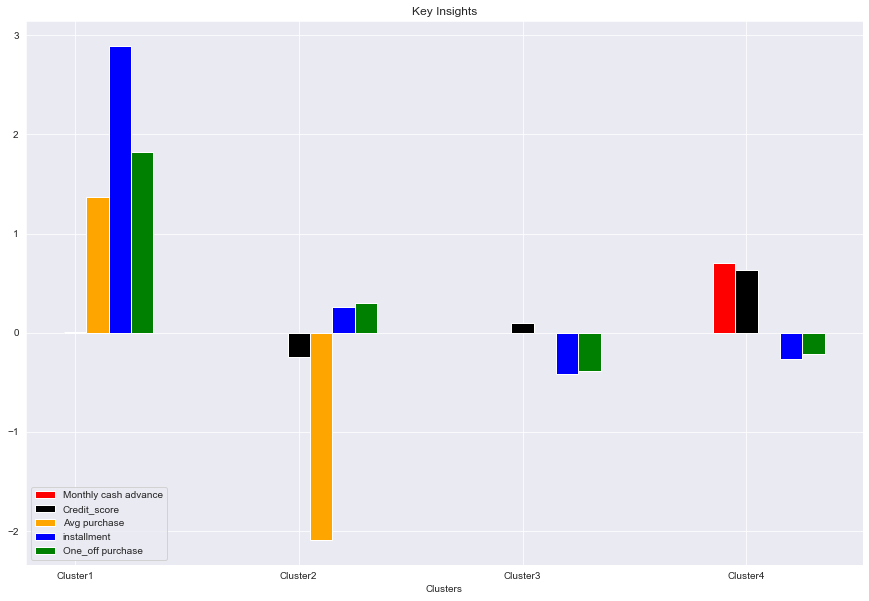

In [54]:
fig,ax = plt.subplots(figsize=(15,10))
index = np.arange(len(cluster_data_group.columns))

cash_advance = np.log(cluster_data_group.loc['Monthly_cash_advance',:].values)
credit_score = (cluster_data_group.loc['Limit Usage',:].values)
purchase = np.log(cluster_data_group.loc['Monthly_avg_purchase',:].values)
installment = cluster_data_group.loc['INSTALLMENTS_PURCHASES',:].values
one_off = cluster_data_group.loc['ONEOFF_PURCHASES_FREQUENCY',:].values


bar_width = .10
b1 = plt.bar(index,cash_advance,color = 'r',label = 'Monthly cash advance',width = bar_width)
b2 = plt.bar(index + bar_width,credit_score,color = 'black',label = 'Credit_score',width = bar_width)
b3 = plt.bar(index + 2 * bar_width,purchase,color = 'orange',label = 'Avg purchase',width = bar_width)
b4 = plt.bar(index + 3 * bar_width,installment,color = 'b',label = 'installment',width = bar_width)
b5 = plt.bar(index + 4 * bar_width,one_off,color = 'g',label = 'One_off purchase',width = bar_width)

plt.xlabel("Clusters")
plt.title("Key Insights")
plt.xticks(index + bar_width, ('Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'))
plt.legend()
plt.show()

### Key Insights and Marketing Strategies:
#### 1. Group 3 and Group 4 customers have good credit score. Thus we can give them vouchers/ extra benefits per purchases.
#### 2. Group 2 customers have low average purchase score, while Group 1 customer have high average purchase score. Thus, we can give some reward points to group 2 customers to increase their purchase score.
#### 3. Except Group 1, all the customers have low one_off purchases. We should work on some strategies so that customers go for one-of purchases rather than installments.